In [1]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
IN_FILE = "../data/raw/OnlineNewsPopularity/OnlineNewsPopularity.csv"
df = pd.read_csv(IN_FILE, header=0, index_col=None, skipinitialspace=True, engine='python')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.shape

(39644, 61)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [5]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
train_df, test_df = train_test_split(df, test_size=9644, random_state=0)
print("# train: {}".format(len(train_df)))
print("# test: {}".format(len(test_df)))

# train: 30000
# test: 9644


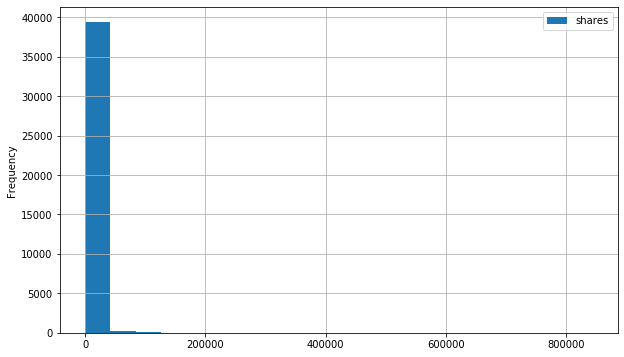

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
df[["shares"]].plot.hist(bins=20, ax=ax)
ax.grid()
plt.show()

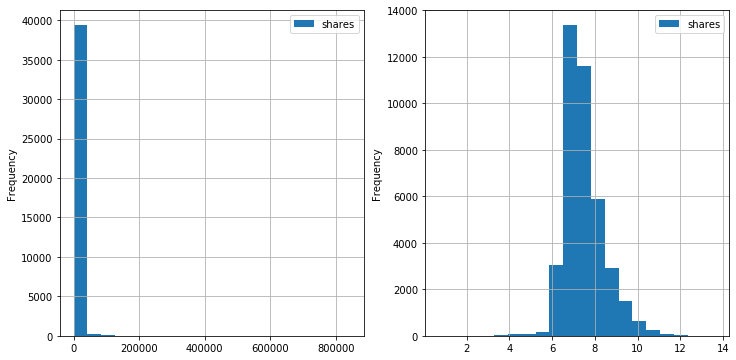

In [8]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
df[["shares"]].plot.hist(bins=20, ax=ax1)
ax1.grid()

ax2 = fig.add_subplot(1, 2, 2)
np.log1p(df[["shares"]]).plot.hist(bins=20, ax=ax2)
ax2.grid()

plt.show()

In [9]:
cols = ['timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']

In [10]:
def create_feature(df):
    return df[cols]

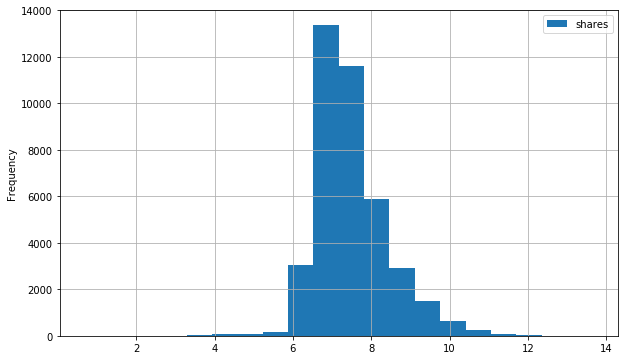

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
np.log1p(df[["shares"]]).plot.hist(bins=20, ax=ax)
ax.grid()
plt.show()

In [12]:
X_train = create_feature(train_df)
y_train = np.log1p(train_df["shares"])
X_train.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
16728,407.0,10.0,284.0,0.620939,1.0,0.741379,6.0,4.0,1.0,0.0,...,0.425758,0.100000,1.00,-0.203571,-0.25,-0.050000,0.4,-0.25,0.1,0.25
33478,104.0,8.0,197.0,0.664948,1.0,0.843478,3.0,2.0,1.0,1.0,...,0.133333,0.050000,0.25,-0.355556,-0.60,-0.155556,0.0,0.00,0.5,0.00
35554,73.0,9.0,310.0,0.591362,1.0,0.671642,13.0,2.0,2.0,0.0,...,0.501429,0.200000,1.00,-0.200000,-0.30,-0.100000,0.0,0.00,0.5,0.00
11093,519.0,8.0,1279.0,0.447077,1.0,0.650880,10.0,3.0,1.0,0.0,...,0.415727,0.033333,1.00,-0.221044,-0.70,-0.071429,0.0,0.00,0.5,0.00
11268,516.0,6.0,1980.0,0.418153,1.0,0.562021,0.0,0.0,31.0,0.0,...,0.276169,0.050000,0.80,-0.217014,-0.80,-0.050000,0.9,0.60,0.4,0.60


In [13]:
X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=0)
lgb_dataset_trn = lgb.Dataset(X_trn, label=y_trn, categorical_feature="auto")
lgb_dataset_val = lgb.Dataset(X_val, label=y_val, categorical_feature="auto")

In [14]:
params = {
        "objective": "rmse",
        "learning_rate": 0.01,
        "max_depth": -1
}

model = lgb.train(
        params=params,
        train_set=lgb_dataset_trn,
        valid_sets=[lgb_dataset_val],
        num_boost_round=10000,
        early_stopping_rounds=100,
        verbose_eval=100
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.871084
[200]	valid_0's rmse: 0.855373
[300]	valid_0's rmse: 0.84866
[400]	valid_0's rmse: 0.845776
[500]	valid_0's rmse: 0.84413
[600]	valid_0's rmse: 0.842772
[700]	valid_0's rmse: 0.842116
[800]	valid_0's rmse: 0.842012
[900]	valid_0's rmse: 0.841966
[1000]	valid_0's rmse: 0.841708
[1100]	valid_0's rmse: 0.841715
Early stopping, best iteration is:
[1012]	valid_0's rmse: 0.841679


In [15]:
def calc_mape(y_true, y_pred):
    data_num = len(y_true)
    mape = (np.sum(np.abs(y_pred - y_true) / y_true) / data_num) * 100
    return mape

In [16]:
train_pred = model.predict(X_train)
train_mape = calc_mape(y_train.values, train_pred)
val_pred = model.predict(X_val)
val_mape = calc_mape(y_val.values, val_pred)
print("train mape: {}".format(train_mape))
print("valid mape: {}".format(val_mape))

train mape: 7.482001607519492
valid mape: 8.158428674338879


In [17]:
def mape_func(y_pred, data):
    y_true = data.get_label()
    mape = calc_mape(y_true, y_pred)
    return "mape", mape, False

In [18]:
result_dic = {}
model = lgb.train(
    params=params,
    train_set=lgb_dataset_trn,
    valid_sets=[lgb_dataset_trn, lgb_dataset_val],
    feval=mape_func,
    num_boost_round=10000,
    verbose_eval=1000,
    evals_result=result_dic
)

[1000]	training's rmse: 0.725351	training's mape: 7.15443	valid_1's rmse: 0.841708	valid_1's mape: 8.15899
[2000]	training's rmse: 0.645064	training's mape: 6.37605	valid_1's rmse: 0.842129	valid_1's mape: 8.15607
[3000]	training's rmse: 0.578876	training's mape: 5.72188	valid_1's rmse: 0.843359	valid_1's mape: 8.16984
[4000]	training's rmse: 0.522167	training's mape: 5.15697	valid_1's rmse: 0.844708	valid_1's mape: 8.18818
[5000]	training's rmse: 0.472385	training's mape: 4.65688	valid_1's rmse: 0.846433	valid_1's mape: 8.21098
[6000]	training's rmse: 0.429536	training's mape: 4.22015	valid_1's rmse: 0.847831	valid_1's mape: 8.22727
[7000]	training's rmse: 0.391847	training's mape: 3.83487	valid_1's rmse: 0.848746	valid_1's mape: 8.23637
[8000]	training's rmse: 0.356381	training's mape: 3.47977	valid_1's rmse: 0.849913	valid_1's mape: 8.24733
[9000]	training's rmse: 0.32593	training's mape: 3.1676	valid_1's rmse: 0.851034	valid_1's mape: 8.26307
[10000]	training's rmse: 0.298319	train

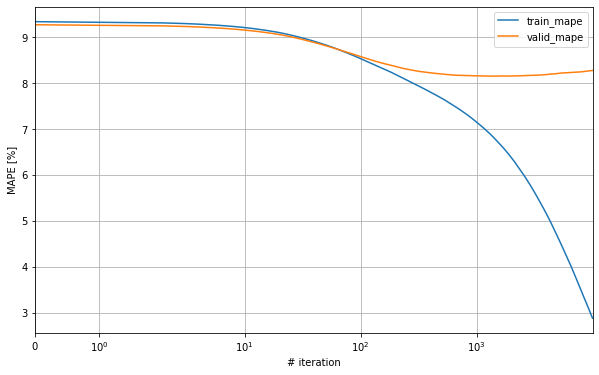

In [19]:
result_df = pd.DataFrame(result_dic["training"]).add_prefix("train_").join(pd.DataFrame(result_dic["valid_1"]).add_prefix("valid_"))
fig, ax = plt.subplots(figsize=(10, 6))
result_df[["train_mape", "valid_mape"]].plot(ax=ax)
ax.set_xscale('symlog')
ax.set_ylabel("MAPE [%]")
ax.set_xlabel("# iteration")
ax.grid()
plt.savefig("loss.png")
plt.show()

In [20]:
X_test = create_feature(test_df)
y_test = np.log1p(test_df["shares"])

In [21]:
test_pred = model.predict(X_test)
test_mape = calc_mape(y_test.values, test_pred)
print("test mape: {}".format(test_mape))

test mape: 8.350622911681121


In [22]:
feature_importance = pd.DataFrame({
    "feature_name": model.feature_name(),
    "importance": model.feature_importance(importance_type="gain")
})
feature_importance = feature_importance.sort_values("importance", ascending=False)

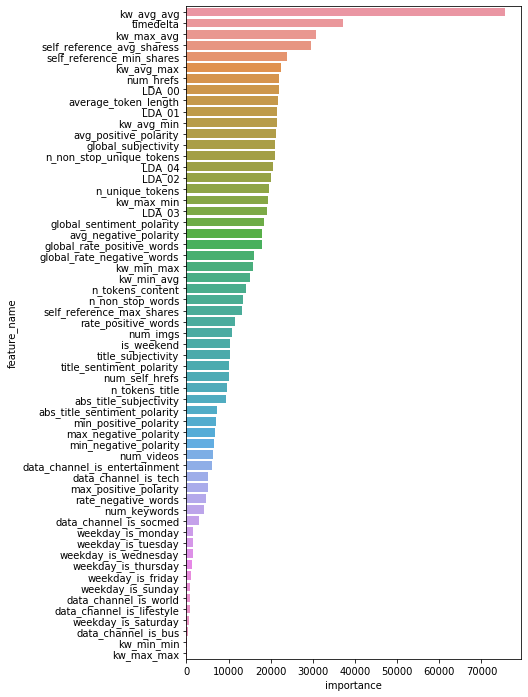

In [23]:
plt.figure(figsize=(6, 12))
sns.barplot(data=feature_importance, x="importance", y="feature_name")
plt.savefig("feature_importance.png")
plt.show()